<a href="https://colab.research.google.com/github/Seungkyu-Han/colab_ml/blob/main/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Gradient Descent

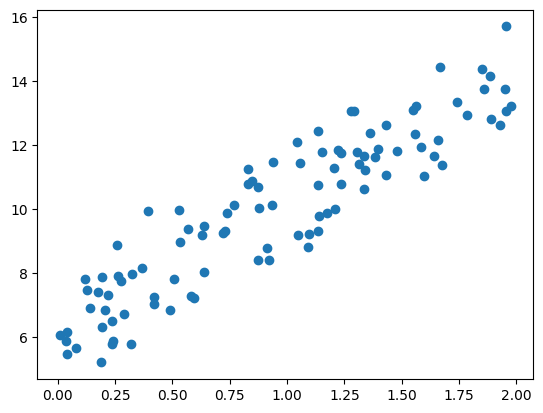

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
x = 2 * np.random.rand(100, 1)
y = 6 + 4 * x + np.random.randn(100, 1)

plt.scatter(x, y)

In [2]:
x.shape, y.shape

((100, 1), (100, 1))

In [3]:
def get_weight_updates(w1, w0, x, y, learning_rate=0.01):
  n = len(y)

  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)

  y_pred = np.dot(x, w1.T) + w0

  diff = y - y_pred

  w0_factors = np.ones((n, 1))

  w1_update = - (2 / n) * learning_rate * (np.dot(x.T, diff))
  w0_update = - (2 / n) * learning_rate * (np.dot(w0_factors.T, diff))

  return w1_update, w0_update

In [4]:
w0 = np.zeros((1, 1))
w1 = np.zeros((1, 1))
y_pred = np.dot(x, w1.T) + w0
diff = y - y_pred
print(diff.shape)
w0_factors = np.ones((100, 1))

w1_update = -(2/100)*0.01*(np.dot(x.T, diff))
w0_update = -(2/100)*0.01*(np.dot(w0_factors.T, diff))

print(w1_update.shape, w0_update.shape)

(100, 1)
(1, 1) (1, 1)


In [5]:
def gradient_descent_steps(x, y, iters = 1000):
  w0 = np.zeros((1, 1))
  w1 = np.zeros((1, 1))

  for index in range(iters):
    w1_update, w0_update = get_weight_updates(w1, w0, x, y, learning_rate=0.01)

    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

### 예측 오차 비용을 계산하는 함수 생성 및 경사 하강법 수행

In [6]:
def get_cost(y, y_pred):
  n = len(y)
  cost = np.sum(np.square(y - y_pred)) / n

  return cost

w1, w0 = gradient_descent_steps(x, y, iters=1000)
print(w1)
print(w0)
print('w1: {0: .3f} w0: {1: .3f}'.format(w1[0,0], w0[0, 0]))
y_pred = w1[0, 0] * x + w0
get_cost(y, y_pred)

[[4.02181364]]
[[6.16203122]]
w1:  4.022 w0:  6.162


np.float64(0.9934784315632568)

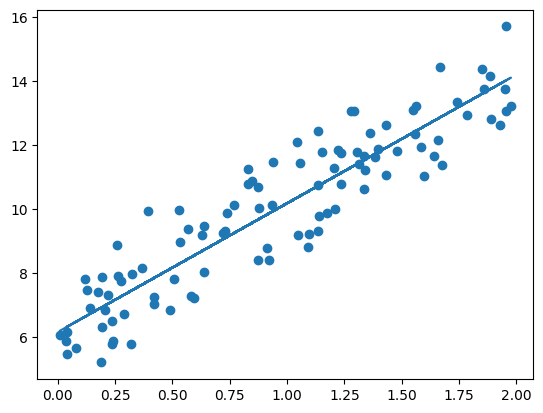

In [7]:
plt.scatter(x, y)
plt.plot(x, y_pred)

### 미니 배치 확률적 경사 하강법을 이용한 최적 비용함수 도출

In [8]:
def stochastic_gradient_descent_steps(x, y, batch_size=10, iters=1000):
  w0 = np.zeros((1, 1))
  w1 = np.zeros((1, 1))

  prev_cost = 100000
  iter_index = 0

  for index in range(iters):
    np.random.seed(index)

    stochastic_random_index = np.random.permutation(x.shape[0])

    sample_x = x[stochastic_random_index[0: batch_size]]
    sample_y = y[stochastic_random_index[0: batch_size]]

    w1_update, w0_update = get_weight_updates(w1, w0, sample_x, sample_y, learning_rate=0.01)

    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [9]:
w1, w0 = stochastic_gradient_descent_steps(x, y, iters=1000)
print(w1)
print(w0)
print('w1: {0: .3f} w0: {1: .3f}'.format(w1[0,0], w0[0, 0]))
y_pred = w1[0, 0] * x + w0
get_cost(y, y_pred)

[[4.02826291]]
[[6.15645891]]
w1:  4.028 w0:  6.156


np.float64(0.9937111256675345)